# 1. Import Required Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from collections import Counter
import re
import datetime as dt

# 2. Load the Dataset

In [24]:
df = pd.read_csv('../data/raw_analyst_ratings.csv')
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


# 3. Basic Information

In [25]:
df.info()
df.describe(include='all')
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

# 4. Clean and Preprocess

In [26]:
# Convert 'date' to datetime object
df['date'] = pd.to_datetime(df['date'], errors='coerce')


# Fill missing publishers if any
df['publisher'] = df['publisher'].fillna('Unknown')

# Create new features
df['headline_length'] = df['headline'].apply(lambda x: len(str(x)))
df['date_only'] = df['date'].dt.date
df['hour'] = df['date'].dt.hour


# 5. Descriptive Statistics

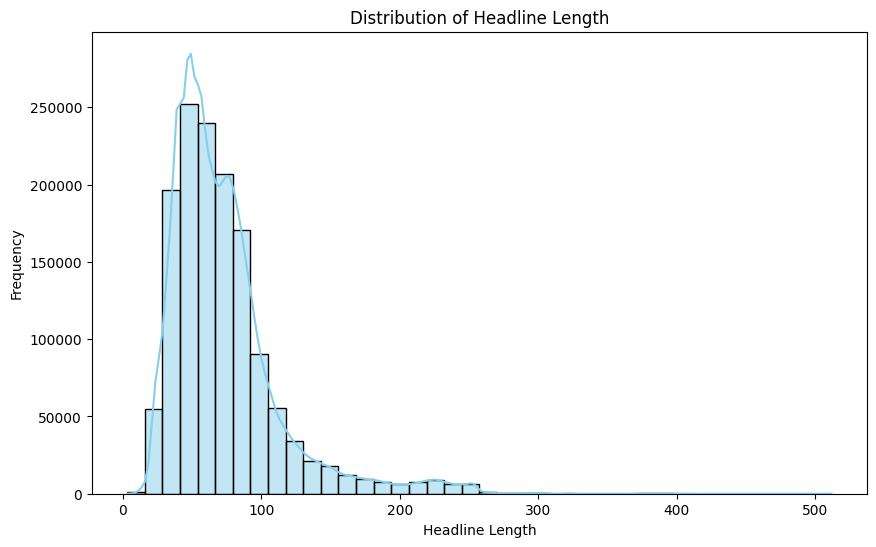

In [27]:
plt.figure(figsize=(10,6))
sns.histplot(df['headline_length'], kde=True, bins=40, color='skyblue')
plt.title('Distribution of Headline Length')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.show()


# Articles Per Publisher

C:\Users\addis\AppData\Local\Temp\ipykernel_26440\1483753431.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='viridis')


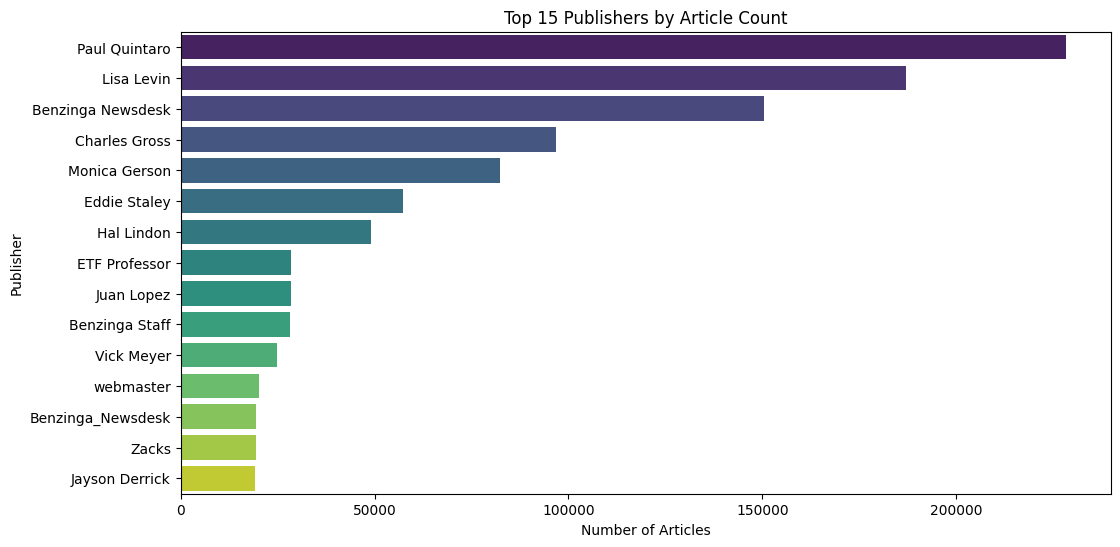

In [28]:
top_publishers = df['publisher'].value_counts().head(15)

plt.figure(figsize=(12,6))
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='viridis')
plt.title('Top 15 Publishers by Article Count')
plt.xlabel('Number of Articles')
plt.ylabel('Publisher')
plt.show()


# Articles Over Time

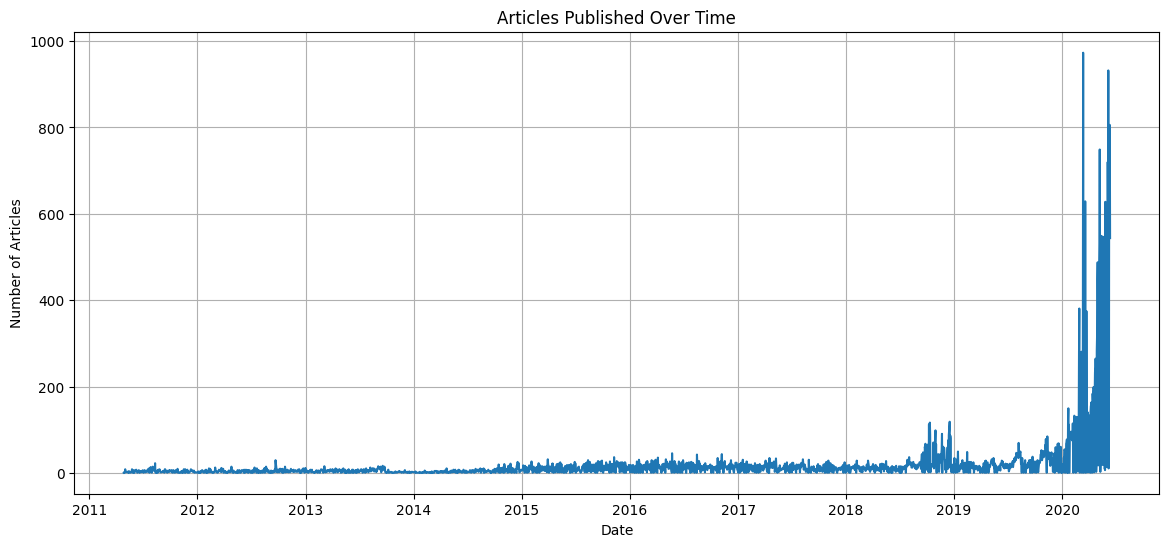

In [29]:
articles_per_day = df.groupby('date_only').size()

plt.figure(figsize=(14,6))
articles_per_day.plot()
plt.title('Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()


# 6. Time-Based Publishing Patterns

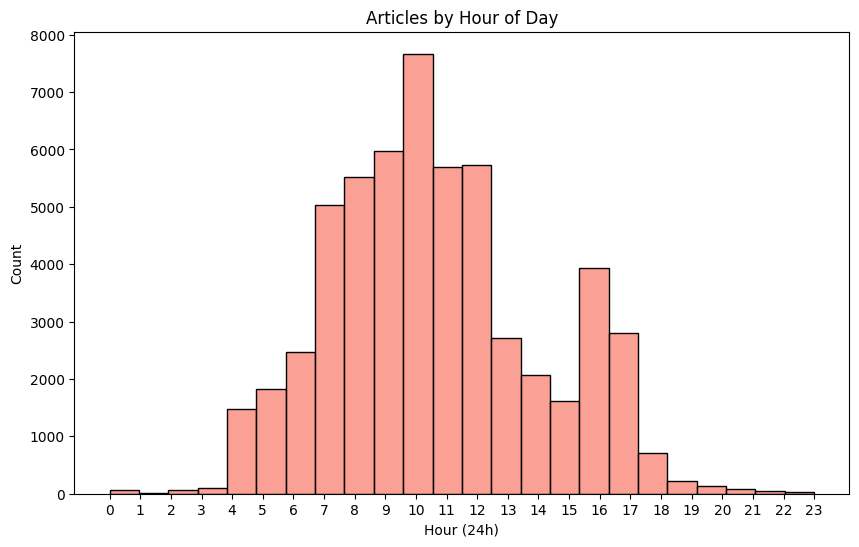

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(df['hour'], bins=24, kde=False, color='salmon')
plt.title('Articles by Hour of Day')
plt.xlabel('Hour (24h)')
plt.ylabel('Count')
plt.xticks(range(0, 24))
plt.show()


# 7. Word Cloud from Headlines

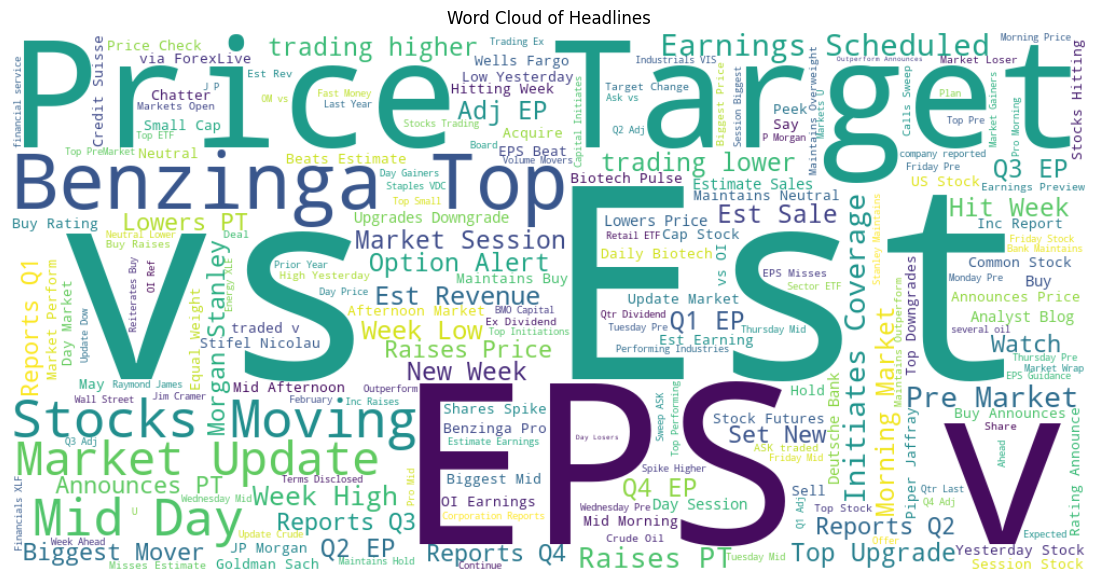

In [31]:
text = ' '.join(str(h) for h in df['headline'])

wordcloud = WordCloud(width=1000, height=500, background_color='white', stopwords=set(stopwords.words('english'))).generate(text)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Headlines')
plt.show()


# 8. Keyword/Topic Frequency

In [32]:
# Tokenize headlines and count frequent terms
all_words = ' '.join(df['headline']).lower()
words = re.findall(r'\b[a-z]{3,}\b', all_words)
filtered_words = [word for word in words if word not in stopwords.words('english')]

top_words = Counter(filtered_words).most_common(20)
word_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(12,6))
sns.barplot(x='Frequency', y='Word', data=word_df, palette='magma')
plt.title('Top 20 Frequent Words in Headlines')
plt.show()


KeyboardInterrupt: 

# 9. Stock Ticker Distribution

C:\Users\addis\AppData\Local\Temp\ipykernel_26440\3914542614.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_stocks.values, y=top_stocks.index, palette='coolwarm')


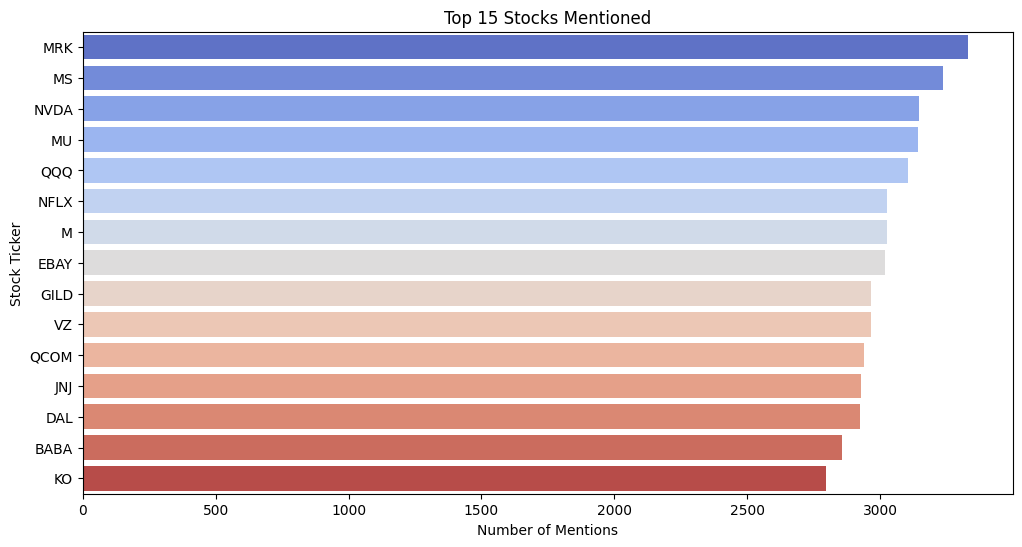

In [33]:
top_stocks = df['stock'].value_counts().head(15)

plt.figure(figsize=(12,6))
sns.barplot(x=top_stocks.values, y=top_stocks.index, palette='coolwarm')
plt.title('Top 15 Stocks Mentioned')
plt.xlabel('Number of Mentions')
plt.ylabel('Stock Ticker')
plt.show()
